In [1]:

from imageio import imread
from PIL import Image
import imageio

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

from PIL import Image, ImageEnhance
%matplotlib inline 

import cv2 # for openCV

In [2]:
image1 = cv2.imread('1.jpeg', 0)
image2 = cv2.imread('2.jpeg', 0)
image3 = cv2.imread('3.jpeg', 0)
image4 = cv2.imread('4.jpeg', 0)
image5 = cv2.imread('5.jpeg', 0)
image6 = cv2.imread('6.jpeg', 0)
image7 = cv2.imread('7.jpeg', 0)
image8 = cv2.imread('8.jpeg', 0)
image9 = cv2.imread('9.jpeg', 0)
image10 = cv2.imread('10.jpeg', 0)

In [3]:
def preview(image_set, titles, figsize): # This is fucntion to preview all images before processing
    
    for p in range(len(image_samples)):
        plt.figure(figsize = (figsize,figsize)) 
        plt.subplot(5,2,p+1)
        plt.imshow(image_samples[p],'gray')
        plt.title(titles[p])
        plt.xticks([]),plt.yticks([])

def crop(image, start_y, end_y, start_x, end_x): # To crop the image
       
    img_cropped = image[start_y:end_y, start_x:end_x]
    
    return img_cropped

def resize(image, width, height): # To resize the image

    img_resized = cv2.resize(image,(width,height))

    return img_resized

def gamma_correction(image, y): # To control the overall brightness of an image
    
    gamma_correct = np.array(255 * (image / 255) ** y , dtype='uint8')
    
    return gamma_correct


def threshold(image): # For object segmenting, this changes the pixels to make the image easier to analyze
    
    thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 255, 19)
    thresh = cv2.bitwise_not(thresh)

    return thresh


def dilation_erosion(image): # Adding and removing pixels in the image to smoothen out the shape
    
    kernel = np.ones((15,15), np.uint8)
    img_dilation = cv2.dilate(image, kernel, iterations=1)
    img_erode = cv2.erode(img_dilation,kernel, iterations=1)

    # clean all noise after dilatation and erosion
    img_erode = cv2.medianBlur(img_erode, 7)
    
    return img_erode


def labeling(image_set): # Counts to total number of objects in an image segment
    
    for i in range(len(images)):
        
        ret, labels = cv2.connectedComponents(images[i])
        label_hue = np.uint8(179 * labels / np.max(labels))
        blank_ch = 255 * np.ones_like(label_hue)
        labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
        labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
        labeled_img[label_hue == 0] = 0
        
        count = str(ret-1)

        plt.title('People counted in this image: '+ count)
        plt.imshow(images[i])
        plt.show()



def plotting(image_set, titles, rows, cols, figsize):
    
    for i in range(len(images)):
        plt.figure( figsize = (figsize,figsize) )
        plt.subplot(rows, cols, i+1)
        
        plt.imshow(images[i],'gray')
        plt.title(titles[i])
        

Image size for all images (height, width): (480, 640)


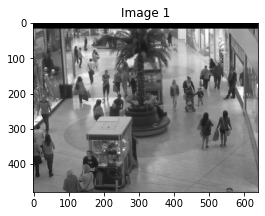

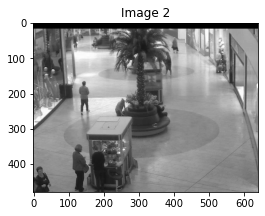

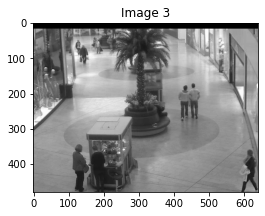

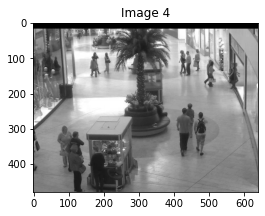

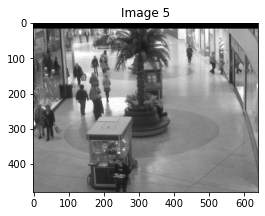

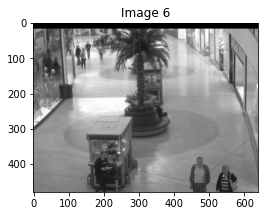

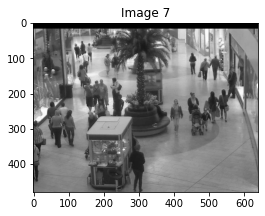

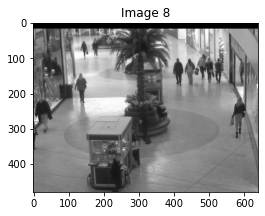

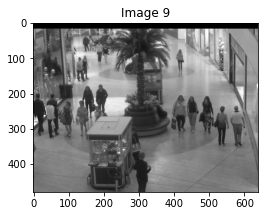

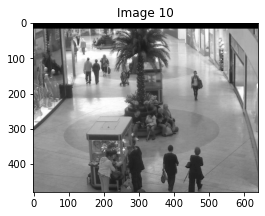

In [4]:
images = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10]
titles = ['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5', 'Image 6', 'Image 7', 'Image 8', 'Image 9', 'Image 10']

plotting(images, titles, 5, 2, 18)

print("Image size for all images (height, width):", (image1.shape))


Cropped Image 1-A size (height, width): (280, 220)
Cropped Image 1-B size (height, width): (200, 200)
Cropped Image 1-C size (height, width): (280, 300)


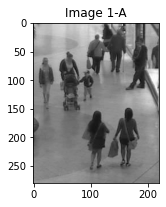

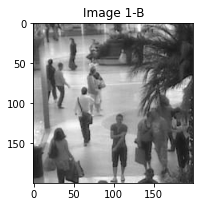

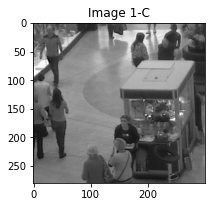

In [5]:

cropped_a1 = crop(image1, 100, 380, 380, 600)
cropped_b1 = crop(image1, 20, 220, 100, 300)
cropped_c1 = crop(image1, 200, 500, 0, 300)

images = [cropped_a1, cropped_b1, cropped_c1]
titles = ['Image 1-A', 'Image 1-B', 'Image 1-C']

plotting(images, titles, 3, 1, 10)

print("Cropped Image 1-A size (height, width):", (cropped_a1.shape))
print("Cropped Image 1-B size (height, width):", (cropped_b1.shape))
print("Cropped Image 1-C size (height, width):", (cropped_c1.shape))

Cropped Image 2-A size (height, width): (170, 175)
Cropped Image 2-B size (height, width): (145, 170)
Cropped Image 2-C size (height, width): (330, 305)


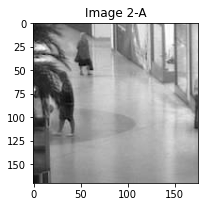

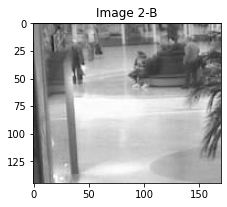

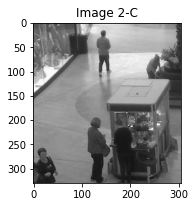

In [6]:

cropped_a2 = crop(image2, 30, 200, 350, 525)
cropped_b2 = crop(image2, 15, 160, 80, 250)
cropped_c2 = crop(image2, 150, 600, 0, 305)

images = [cropped_a2, cropped_b2, cropped_c2]
titles = ['Image 2-A', 'Image 2-B', 'Image 2-C']

plotting(images, titles, 3, 1, 10)

print("Cropped Image 2-A size (height, width):", (cropped_a2.shape))
print("Cropped Image 2-B size (height, width):", (cropped_b2.shape))
print("Cropped Image 2-C size (height, width):", (cropped_c2.shape))

Cropped Image 3-A size (height, width): (380, 255)
Cropped Image 3-B size (height, width): (145, 175)
Cropped Image 3-C size (height, width): (300, 265)


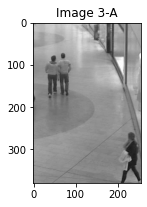

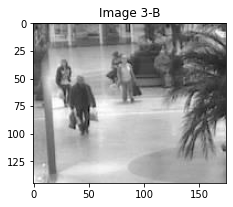

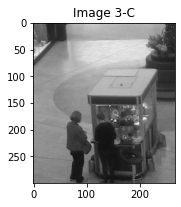

In [7]:

cropped_a3 = crop(image3, 100, 600, 385, 800)
cropped_b3 = crop(image3, 15, 160, 100, 275)
cropped_c3 = crop(image3, 180, 600, 50, 315)

images = [cropped_a3, cropped_b3, cropped_c3]
titles = ['Image 3-A', 'Image 3-B', 'Image 3-C']

plotting(images, titles, 3, 1, 10)

print("Cropped Image 3-A size (height, width):", (cropped_a3.shape))
print("Cropped Image 3-B size (height, width):", (cropped_b3.shape))
print("Cropped Image 3-C size (height, width):", (cropped_c3.shape))

Cropped Image 4-A size (height, width): (170, 210)
Cropped Image 4-B size (height, width): (145, 225)
Cropped Image 4-C size (height, width): (290, 525)


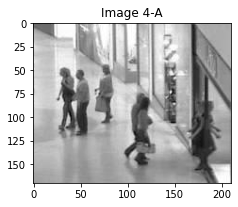

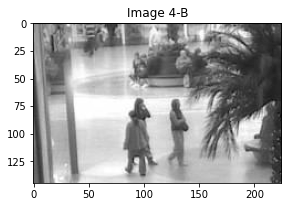

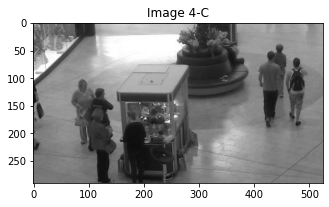

In [8]:


cropped_a4 = crop(image4, 30, 200, 390, 600)
cropped_b4 = crop(image4, 15, 160, 80, 305)
cropped_c4 = crop(image4, 190, 600, 0, 525)

images = [cropped_a4, cropped_b4, cropped_c4]
titles = ['Image 4-A', 'Image 4-B', 'Image 4-C']

plotting(images, titles, 3, 1, 10)

print("Cropped Image 4-A size (height, width):", (cropped_a4.shape))
print("Cropped Image 4-B size (height, width):", (cropped_b4.shape))
print("Cropped Image 4-C size (height, width):", (cropped_c4.shape))

Cropped Image 5-A size (height, width): (170, 185)
Cropped Image 5-B size (height, width): (335, 320)
Cropped Image 5-C size (height, width): (200, 225)


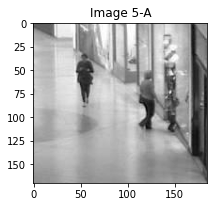

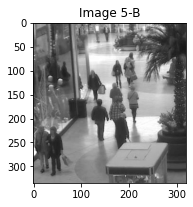

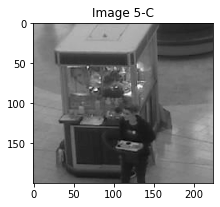

In [9]:

cropped_a5 = crop(image5, 30, 200, 390, 575)
cropped_b5 = crop(image5, 15, 350, 0, 320)
cropped_c5 = crop(image5, 280, 600, 125, 350)

images = [cropped_a5, cropped_b5, cropped_c5]
titles = ['Image 5-A', 'Image 5-B', 'Image 5-C']

plotting(images, titles, 3, 1, 10)

print("Cropped Image 5-A size (height, width):", (cropped_a5.shape))
print("Cropped Image 5-B size (height, width):", (cropped_b5.shape))
print("Cropped Image 5-C size (height, width):", (cropped_c5.shape))

Cropped Image 6-A size (height, width): (230, 260)
Cropped Image 6-B size (height, width): (145, 175)
Cropped Image 6-C size (height, width): (200, 245)


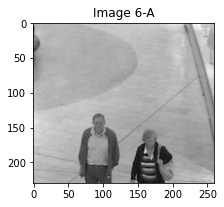

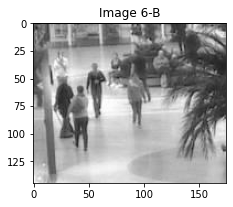

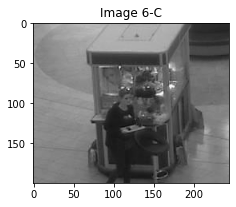

In [10]:

cropped_a6 = crop(image6, 250, 650, 380, 650)
cropped_b6 = crop(image6, 15, 160, 100, 275)
cropped_c6 = crop(image6, 280, 600, 85, 330)

images = [cropped_a6, cropped_b6, cropped_c6]
titles = ['Image 6-A', 'Image 6-B', 'Image 6-C']

plotting(images, titles, 3, 1, 10)

print("Cropped Image 6-A size (height, width):", (cropped_a6.shape))
print("Cropped Image 6-B size (height, width):", (cropped_b6.shape))
print("Cropped Image 6-C size (height, width):", (cropped_c6.shape))

Cropped Image 7-A size (height, width): (310, 220)
Cropped Image 7-B size (height, width): (470, 348)
Cropped Image 8-A size (height, width): (310, 200)
Cropped Image 8-B size (height, width): (105, 150)
Cropped Image 8-C size (height, width): (360, 260)


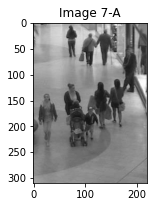

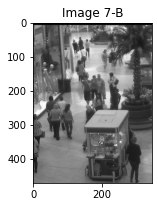

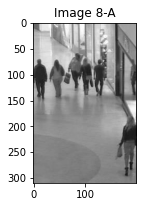

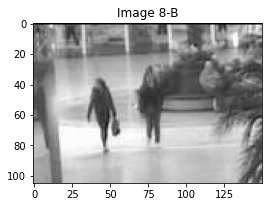

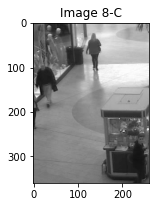

In [11]:

cropped_a7 = crop(image7, 80, 390, 380, 600)
cropped_b7 = crop(image7, 10, 600, 2, 350)

images = [cropped_a7, cropped_b7]
titles = ['Image 7-A', 'Image 7-B']

plotting(images, titles, 3, 1, 10)

print("Cropped Image 7-A size (height, width):", (cropped_a7.shape))
print("Cropped Image 7-B size (height, width):", (cropped_b7.shape))


# Cropping segments for image 8

cropped_a8 = crop(image8, 30, 340, 400, 600)
cropped_b8 = crop(image8, 15, 120, 100, 250)
cropped_c8 = crop(image8, 120, 500, 0, 260)

images = [cropped_a8, cropped_b8, cropped_c8]
titles = ['Image 8-A', 'Image 8-B', 'Image 8-C']

plotting(images, titles, 3, 1, 10)

print("Cropped Image 8-A size (height, width):", (cropped_a8.shape))
print("Cropped Image 8-B size (height, width):", (cropped_b8.shape))
print("Cropped Image 8-C size (height, width):", (cropped_c8.shape))


Cropped Image 9-A size (height, width): (330, 300)
Cropped Image 9-B size (height, width): (320, 250)
Cropped Image 9-C size (height, width): (190, 170)
Cropped Image 10-A size (height, width): (460, 285)
Cropped Image 10-B size (height, width): (460, 250)


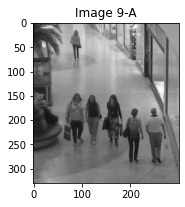

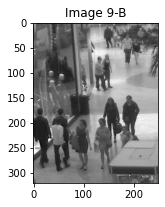

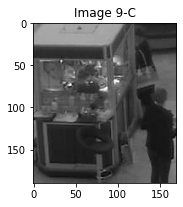

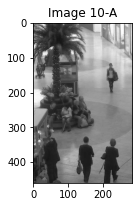

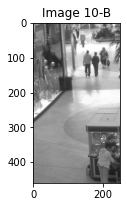

In [12]:
cropped_a9 = crop(image9, 60, 390, 330, 630)
cropped_b9 = crop(image9, 30, 350, 0, 250)
cropped_c9 = crop(image9, 290, 490, 160, 330)

images = [cropped_a9, cropped_b9, cropped_c9]
titles = ['Image 9-A', 'Image 9-B', 'Image 9-C']

plotting(images, titles, 3, 1, 10)

print("Cropped Image 9-A size (height, width):", (cropped_a9.shape))
print("Cropped Image 9-B size (height, width):", (cropped_b9.shape))
print("Cropped Image 9-C size (height, width):", (cropped_c9.shape))


# Cropping segments for image 10

cropped_a10 = crop(image10, 20, 490, 240, 525)
cropped_b10 = crop(image10, 20, 500, 0, 250)

images = [cropped_a10, cropped_b10]
titles = ['Image 10-A', 'Image 10-B']

plotting(images, titles, 3, 1, 10)

print("Cropped Image 10-A size (height, width):", (cropped_a10.shape))
print("Cropped Image 10-B size (height, width):", (cropped_b10.shape))

Resized Image 1-A size (height, width): (560, 440)
Resized Image 1-B size (height, width): (400, 400)
Resized Image 1-C size (height, width): (600, 560)


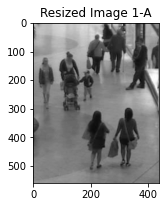

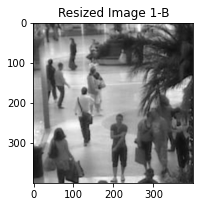

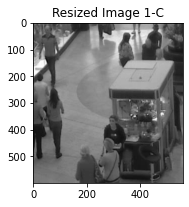

In [13]:

multiplier = 2

resized_a1 = resize(cropped_a1, (cropped_a1.shape[1])*multiplier, (cropped_a1.shape[0])*multiplier)
resized_b1 = resize(cropped_b1, (cropped_b1.shape[0])*multiplier, (cropped_b1.shape[1])*multiplier)
resized_c1 = resize(cropped_c1, (cropped_c1.shape[0])*multiplier, (cropped_c1.shape[1])*multiplier)

images = [resized_a1, resized_b1, resized_c1]
titles = ['Resized Image 1-A', 'Resized Image 1-B', 'Resized Image 1-C']

plotting(images, titles, 3, 1, 10)

print("Resized Image 1-A size (height, width):", (resized_a1.shape))
print("Resized Image 1-B size (height, width):", (resized_b1.shape))
print("Resized Image 1-C size (height, width):", (resized_c1.shape))

Resized Image 2-A size (height, width): (340, 350)
Resized Image 2-B size (height, width): (290, 340)
Resized Image 2-C size (height, width): (610, 660)


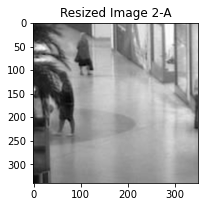

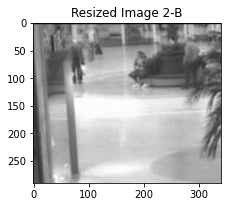

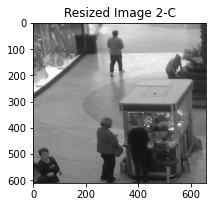

In [14]:
# For image 2

multiplier = 2

resized_a2 = resize(cropped_a2, (cropped_a2.shape[1])*multiplier, (cropped_a2.shape[0])*multiplier)
resized_b2 = resize(cropped_b2, (cropped_b2.shape[1])*multiplier, (cropped_b2.shape[0])*multiplier)
resized_c2 = resize(cropped_c2, (cropped_c2.shape[0])*multiplier, (cropped_c2.shape[1])*multiplier)

images = [resized_a2, resized_b2, resized_c2]
titles = ['Resized Image 2-A', 'Resized Image 2-B', 'Resized Image 2-C']

plotting(images, titles, 3, 1, 10)

print("Resized Image 2-A size (height, width):", (resized_a2.shape))
print("Resized Image 2-B size (height, width):", (resized_b2.shape))
print("Resized Image 2-C size (height, width):", (resized_c2.shape))

Resized Image 3-A size (height, width): (760, 510)
Resized Image 3-B size (height, width): (290, 350)
Resized Image 3-C size (height, width): (530, 600)


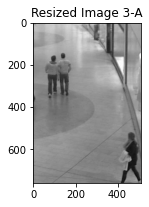

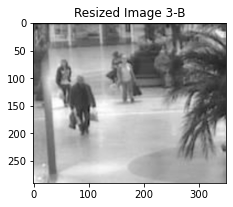

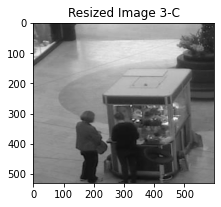

In [15]:
# For image 3

multiplier = 2

resized_a3 = resize(cropped_a3, (cropped_a3.shape[1])*multiplier, (cropped_a3.shape[0])*multiplier)
resized_b3 = resize(cropped_b3, (cropped_b3.shape[1])*multiplier, (cropped_b3.shape[0])*multiplier)
resized_c3 = resize(cropped_c3, (cropped_c3.shape[0])*multiplier, (cropped_c3.shape[1])*multiplier)

images = [resized_a3, resized_b3, resized_c3]
titles = ['Resized Image 3-A', 'Resized Image 3-B', 'Resized Image 3-C']

plotting(images, titles, 3, 1, 10)

print("Resized Image 3-A size (height, width):", (resized_a3.shape))
print("Resized Image 3-B size (height, width):", (resized_b3.shape))
print("Resized Image 3-C size (height, width):", (resized_c3.shape))

Resized Image 4-A size (height, width): (340, 420)
Resized Image 4-B size (height, width): (290, 450)
Resized Image 4-C size (height, width): (580, 1050)


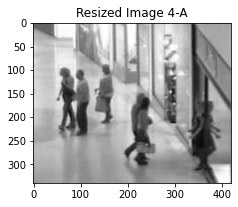

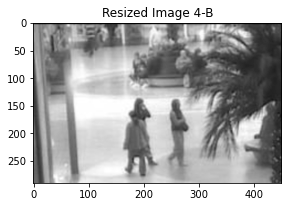

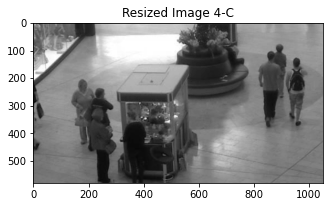

In [16]:
# For image 4

multiplier = 2

resized_a4 = resize(cropped_a4, (cropped_a4.shape[1])*multiplier, (cropped_a4.shape[0])*multiplier)
resized_b4 = resize(cropped_b4, (cropped_b4.shape[1])*multiplier, (cropped_b4.shape[0])*multiplier)
resized_c4 = resize(cropped_c4, (cropped_c4.shape[1])*multiplier, (cropped_c4.shape[0])*multiplier)

images = [resized_a4, resized_b4, resized_c4]
titles = ['Resized Image 4-A', 'Resized Image 4-B', 'Resized Image 4-C']

plotting(images, titles, 3, 1, 10)

print("Resized Image 4-A size (height, width):", (resized_a4.shape))
print("Resized Image 4-B size (height, width):", (resized_b4.shape))
print("Resized Image 4-C size (height, width):", (resized_c4.shape))

Resized Image 5-A size (height, width): (340, 370)
Resized Image 5-B size (height, width): (670, 640)
Resized Image 5-C size (height, width): (450, 400)


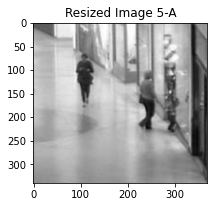

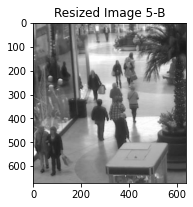

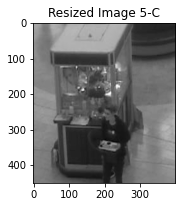

In [17]:
# For image 5

multiplier = 2

resized_a5 = resize(cropped_a5, (cropped_a5.shape[1])*multiplier, (cropped_a5.shape[0])*multiplier)
resized_b5 = resize(cropped_b5, (cropped_b5.shape[1])*multiplier, (cropped_b5.shape[0])*multiplier)
resized_c5 = resize(cropped_c5, (cropped_c5.shape[0])*multiplier, (cropped_c5.shape[1])*multiplier)

images = [resized_a5, resized_b5, resized_c5]
titles = ['Resized Image 5-A', 'Resized Image 5-B', 'Resized Image 5-C']

plotting(images, titles, 3, 1, 10)

print("Resized Image 5-A size (height, width):", (resized_a5.shape))
print("Resized Image 5-B size (height, width):", (resized_b5.shape))
print("Resized Image 5-C size (height, width):", (resized_c5.shape))

Resized Image 6-A size (height, width): (460, 520)
Resized Image 6-B size (height, width): (290, 350)
Resized Image 6-C size (height, width): (400, 490)


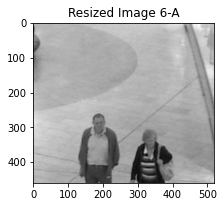

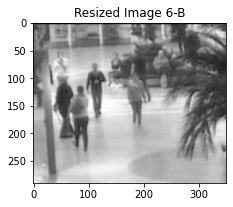

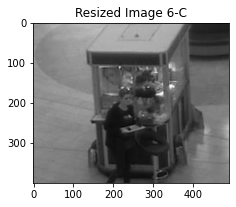

In [18]:
# For image 6

multiplier = 2

resized_a6 = resize(cropped_a6, (cropped_a6.shape[1])*multiplier, (cropped_a6.shape[0])*multiplier)
resized_b6 = resize(cropped_b6, (cropped_b6.shape[1])*multiplier, (cropped_b6.shape[0])*multiplier)
resized_c6 = resize(cropped_c6, (cropped_c6.shape[1])*multiplier, (cropped_c6.shape[0])*multiplier)

images = [resized_a6, resized_b6, resized_c6]
titles = ['Resized Image 6-A', 'Resized Image 6-B', 'Resized Image 6-C']

plotting(images, titles, 3, 1, 10)

print("Resized Image 6-A size (height, width):", (resized_a6.shape))
print("Resized Image 6-B size (height, width):", (resized_b6.shape))
print("Resized Image 6-C size (height, width):", (resized_c6.shape))

Resized Image 7-A size (height, width): (620, 440)
Resized Image 7-B size (height, width): (940, 696)


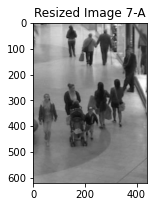

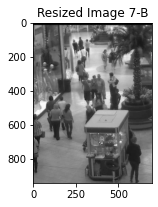

In [19]:
# For image 7

multiplier = 2

resized_a7 = resize(cropped_a7, (cropped_a7.shape[1])*multiplier, (cropped_a7.shape[0])*multiplier)
resized_b7 = resize(cropped_b7, (cropped_b7.shape[1])*multiplier, (cropped_b7.shape[0])*multiplier)

images = [resized_a7, resized_b7]
titles = ['Resized Image 7-A', 'Resized Image 7-B']

plotting(images, titles, 3, 1, 10)

print("Resized Image 7-A size (height, width):", (resized_a7.shape))
print("Resized Image 7-B size (height, width):", (resized_b7.shape))

Resized Image 8-A size (height, width): (620, 400)
Resized Image 8-B size (height, width): (210, 300)
Resized Image 8-C size (height, width): (720, 520)


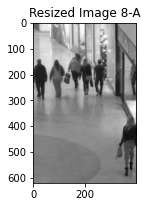

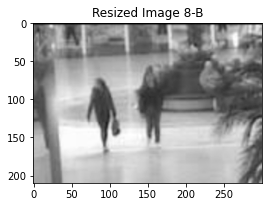

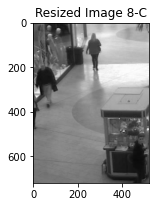

In [20]:

# For image 8

multiplier = 2

resized_a8 = resize(cropped_a8, (cropped_a8.shape[1])*multiplier, (cropped_a8.shape[0])*multiplier)
resized_b8 = resize(cropped_b8, (cropped_b8.shape[1])*multiplier, (cropped_b8.shape[0])*multiplier)
resized_c8 = resize(cropped_c8, (cropped_c8.shape[1])*multiplier, (cropped_c8.shape[0])*multiplier)

images = [resized_a8, resized_b8, resized_c8]
titles = ['Resized Image 8-A', 'Resized Image 8-B', 'Resized Image 8-C']

plotting(images, titles, 3, 1, 10)

print("Resized Image 8-A size (height, width):", (resized_a8.shape))
print("Resized Image 8-B size (height, width):", (resized_b8.shape))
print("Resized Image 8-C size (height, width):", (resized_c8.shape))


Resized Image 9-A size (height, width): (660, 600)
Resized Image 9-B size (height, width): (640, 500)
Resized Image 9-C size (height, width): (380, 340)


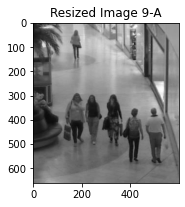

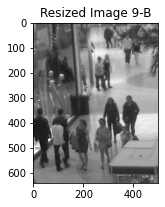

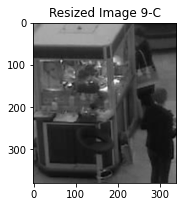

In [21]:


# For image 9

multiplier = 2

resized_a9 = resize(cropped_a9, (cropped_a9.shape[1])*multiplier, (cropped_a9.shape[0])*multiplier)
resized_b9 = resize(cropped_b9, (cropped_b9.shape[1])*multiplier, (cropped_b9.shape[0])*multiplier)
resized_c9 = resize(cropped_c9, (cropped_c9.shape[1])*multiplier, (cropped_c9.shape[0])*multiplier)

images = [resized_a9, resized_b9, resized_c9]
titles = ['Resized Image 9-A', 'Resized Image 9-B', 'Resized Image 9-C']

plotting(images, titles, 3, 1, 10)

print("Resized Image 9-A size (height, width):", (resized_a9.shape))
print("Resized Image 9-B size (height, width):", (resized_b9.shape))
print("Resized Image 9-C size (height, width):", (resized_c9.shape))

Resized Image 10-A size (height, width): (920, 570)
Resized Image 10-B size (height, width): (920, 500)


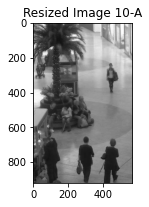

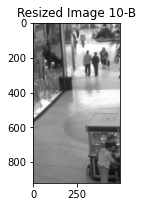

In [22]:

# For image 10

multiplier = 2

resized_a10 = resize(cropped_a10, (cropped_a10.shape[1])*multiplier, (cropped_a10.shape[0])*multiplier)
resized_b10 = resize(cropped_b10, (cropped_b10.shape[1])*multiplier, (cropped_b10.shape[0])*multiplier)

images = [resized_a10, resized_b10]
titles = ['Resized Image 10-A', 'Resized Image 10-B']

plotting(images, titles, 3, 1, 10)

print("Resized Image 10-A size (height, width):", (resized_a10.shape))
print("Resized Image 10-B size (height, width):", (resized_b10.shape))

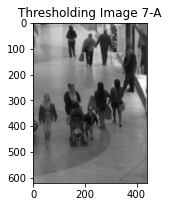

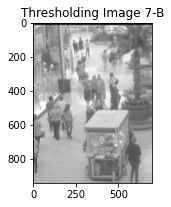

In [23]:
#for image 7

gamma_a7 = gamma_correction(resized_a7, 1.2)
gamma_b7 = gamma_correction(resized_b7, 0.5)

images = [gamma_a7, gamma_b7]
titles = ['Thresholding Image 7-A', 'Thresholding Image 7-B']

plotting(images, titles, 3, 1, 10)


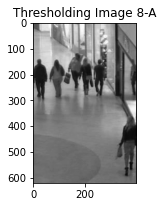

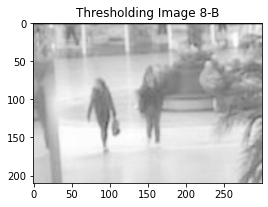

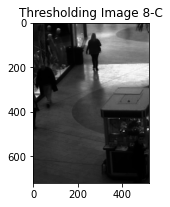

In [24]:

#for image 8

gamma_a8 = gamma_correction(resized_a8, 1.2)
gamma_b8 = gamma_correction(resized_b8, 0.5)
gamma_c8 = gamma_correction(resized_c8, 2.5)

images = [gamma_a8, gamma_b8, gamma_c8]
titles = ['Thresholding Image 8-A', 'Thresholding Image 8-B', 'Thresholding Image 8-C']

plotting(images, titles, 3, 1, 10)


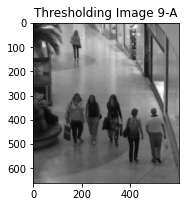

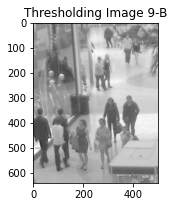

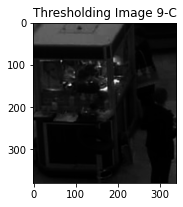

In [25]:

#for image 9

gamma_a9 = gamma_correction(resized_a9, 1.2)
gamma_b9 = gamma_correction(resized_b9, 0.5)
gamma_c9 = gamma_correction(resized_c9, 2.5)

images = [gamma_a9, gamma_b9, gamma_c9]
titles = ['Thresholding Image 9-A', 'Thresholding Image 9-B', 'Thresholding Image 9-C']

plotting(images, titles, 3, 1, 10)


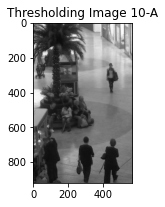

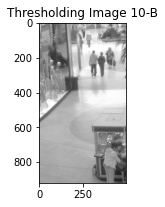

In [26]:


#for image 10

gamma_a10 = gamma_correction(resized_a10, 1.2)
gamma_b10 = gamma_correction(resized_b10, 0.5)

images = [gamma_a10, gamma_b10]
titles = ['Thresholding Image 10-A', 'Thresholding Image 10-B']

plotting(images, titles, 3, 1, 10)

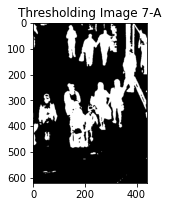

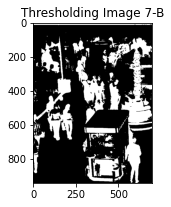

In [27]:
#for image 7

threshold_a7 = threshold(gamma_a7)
threshold_b7 = threshold(gamma_b7)

images = [threshold_a7, threshold_b7]
titles = ['Thresholding Image 7-A', 'Thresholding Image 7-B']

plotting(images, titles, 3, 1, 10)



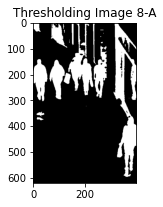

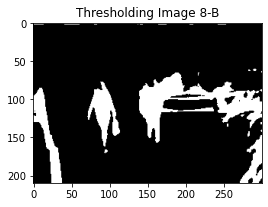

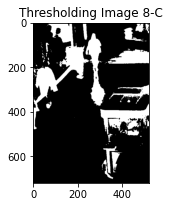

In [28]:

#for image 8

threshold_a8 = threshold(gamma_a8)
threshold_b8 = threshold(gamma_b8)
threshold_c8 = threshold(gamma_c8)

images = [threshold_a8, threshold_b8, threshold_c8]
titles = ['Thresholding Image 8-A', 'Thresholding Image 8-B', 'Thresholding Image 8-C']

plotting(images, titles, 3, 1, 10)

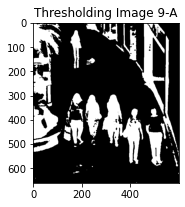

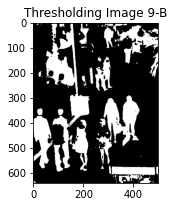

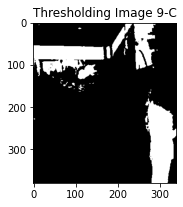

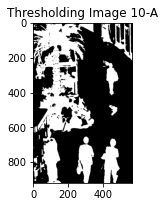

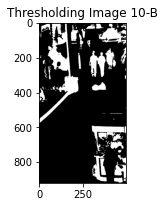

In [29]:
#for image 9

threshold_a9 = threshold(gamma_a9)
threshold_b9 = threshold(gamma_b9)
threshold_c9 = threshold(gamma_c9)

images = [threshold_a9, threshold_b9, threshold_c9]
titles = ['Thresholding Image 9-A', 'Thresholding Image 9-B', 'Thresholding Image 9-C']

plotting(images, titles, 3, 1, 10)


#for image 10

threshold_a10 = threshold(gamma_a10)
threshold_b10 = threshold(gamma_b10)

images = [threshold_a10, threshold_b10]
titles = ['Thresholding Image 10-A', 'Thresholding Image 10-B']

plotting(images, titles, 3, 1, 10)

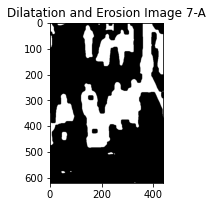

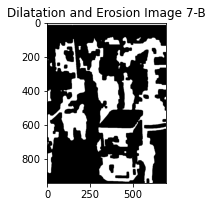

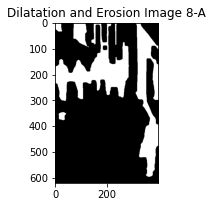

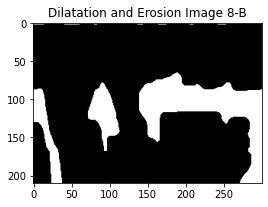

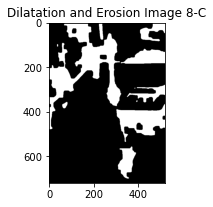

In [30]:
#for image 7

dlt_er_a7 = dilation_erosion(threshold_a7)
dlt_er_b7 = dilation_erosion(threshold_b7)

images = [dlt_er_a7, dlt_er_b7]
titles = ['Dilatation and Erosion Image 7-A', 'Dilatation and Erosion Image 7-B']

plotting(images, titles, 3, 1, 10)


#for image 8

dlt_er_a8 = dilation_erosion(threshold_a8)
dlt_er_b8 = dilation_erosion(threshold_b8)
dlt_er_c8 = dilation_erosion(threshold_c8)

images = [dlt_er_a8, dlt_er_b8, dlt_er_c8]
titles = ['Dilatation and Erosion Image 8-A', 'Dilatation and Erosion Image 8-B', 'Dilatation and Erosion Image 8-C']

plotting(images, titles, 3, 1, 10)

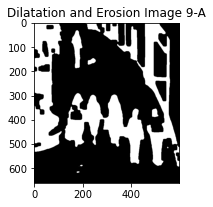

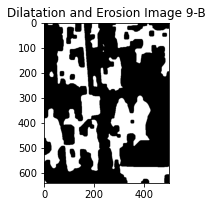

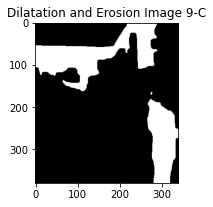

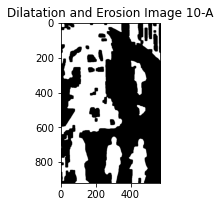

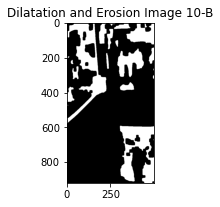

In [31]:
#for image 9

dlt_er_a9 = dilation_erosion(threshold_a9)
dlt_er_b9 = dilation_erosion(threshold_b9)
dlt_er_c9 = dilation_erosion(threshold_c9)

images = [dlt_er_a9, dlt_er_b9, dlt_er_c9]
titles = ['Dilatation and Erosion Image 9-A', 'Dilatation and Erosion Image 9-B', 'Dilatation and Erosion Image 9-C']

plotting(images, titles, 3, 1, 10)


#for image 10

dlt_er_a10 = dilation_erosion(threshold_a10)
dlt_er_b10 = dilation_erosion(threshold_b10)

images = [dlt_er_a10, dlt_er_b10]
titles = ['Dilatation and Erosion Image 10-A', 'Dilatation and Erosion Image 10-B']

plotting(images, titles, 3, 1, 10)

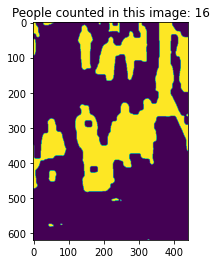

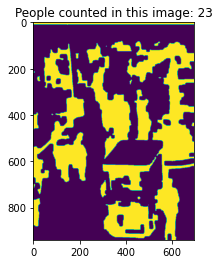

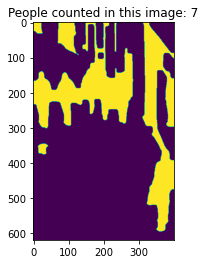

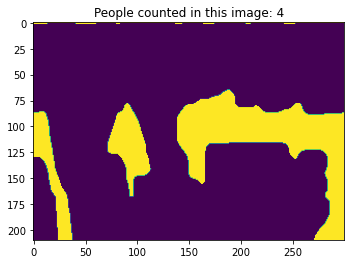

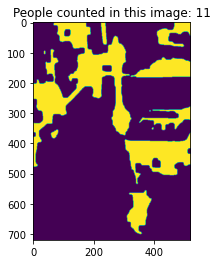

In [32]:
#for image 7

images = [dlt_er_a7, dlt_er_b7]

labeling(images)


#for image 8

images = [dlt_er_a8, dlt_er_b8, dlt_er_c8]

labeling(images)


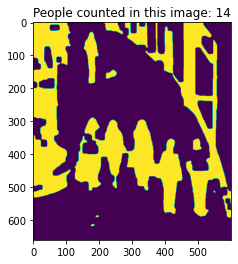

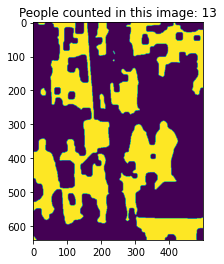

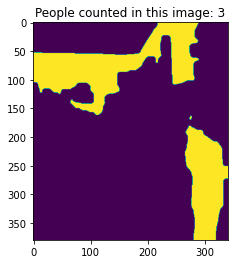

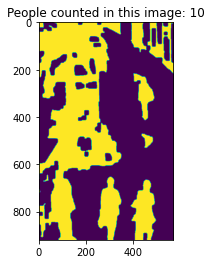

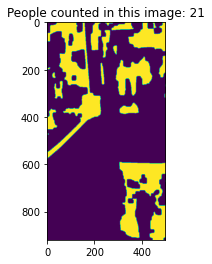

In [33]:

#for image 9

images = [dlt_er_a9, dlt_er_b9, dlt_er_c9]

labeling(images)


#for image 10

images = [dlt_er_a10, dlt_er_b10]

labeling(images)